In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# '../data/cleaned/clean_middlesex.csv'
# '../data/cleaned/clean_northwestern.csv'
# '../data/cleaned/clean_suffolk.csv'

middlesex_df = pd.read_csv('../data/cleaned/clean_middlesex.csv', low_memory=False)
northwestern_df = pd.read_csv('../data/cleaned/clean_northwestern.csv', low_memory=False)
suffolk_df = pd.read_csv('../data/cleaned/clean_suffolk.csv', low_memory=False)

# Csv containing Chapter-Section titles
info_df = pd.read_csv('Part-Title-Chapter-Section.csv', low_memory=False)

In [3]:
# Inputs:
#   - df: dataframe to be cleaned;
#         mostly removes Paragraphs from Section column
#         some Chapter entries end in commas, so commas are removed
# Outputs:
#   - df: cleaned dataframe
def clean_data(df):
    df = df.fillna('NaN')
    df['Chapter'] = [re.split('[,]', row, maxsplit=1)[0] for row in df['Chapter']]
    df['Section'] = [re.split('[(Ã \-]', row, maxsplit=1)[0] for row in df['Section']]
    return df

# Inputs:
#   - df: dataframe to be analyzed and displayed
#   - DA_name: district name; added to title of plots
#   - num_bars: number of bars to be displayed; first 10 bars are always red
# Outputs:
#   - data_df: dataframe containing Chapter-Section pairs, # of Cases, Percent Frequency, Cumulative Frequency
def plot_frequency(df, DA_name='DA', num_bars=25):
    # Generate column for Chapter-Section pairs and find # of entries for each pair
    # Calculate Percent Frequency and Cumulative Frequency
    df['ChapterSection'] = df['Chapter'] + '-' + df['Section']
    df_size = df['ChapterSection'].size
    percent_frequency = df['ChapterSection'].value_counts().sort_values(ascending=False) / df_size * 100
    cumulative_frequency = percent_frequency.cumsum()
    
    # Returns dataframe w/ columns for Chapter-Section, Absolute Number of Cases, Percent Frequency, & Cumulative Frequency
    data_df = pd.concat([df['ChapterSection'].value_counts().rename('Absolute # of Cases'),
                         percent_frequency.rename('Percent Frequency (%)'),
                         cumulative_frequency.rename('Cumulative Frequency (%)')], axis=1)
    data_df.reset_index(level=data_df.index.names, inplace=True)
    data_df.rename(columns={'index': 'Chapter-Section'}, inplace=True)
    
    # Add Chapter and Section data to use as keys to pair w/ Section_Heading
    data_df['Chapter'] = [cs.split('-')[0] for cs in data_df['Chapter-Section']]
    data_df['Section'] = [cs.split('-')[1] for cs in data_df['Chapter-Section']]
    data_df = data_df.merge(info_df[['Chapter', 'Section', 'Section_Heading']], how='left', on=['Chapter', 'Section'])
    data_df.fillna('', inplace=True)
    
    # Plot!!!
    fig, axes = plt.subplots(2, 1, figsize=(15, 15))
    colors = ['#d62728']*10 + ['#1f77b4']*(num_bars-10)*(num_bars>10)
    yticklabels = [f'{cs}: {sh[:27]}..' if len(sh) > 30 else f'{cs}: {sh}' for cs, sh in zip(data_df['Chapter-Section'].iloc[:num_bars], data_df['Section_Heading'].iloc[:num_bars])]

    percent_frequency.iloc[:num_bars].plot(kind='barh', ax=axes[0], color=colors)
    axes[0].set_title(DA_name + ' Chapter-Section Percent Frequency', fontsize=15)
    axes[0].set_yticklabels(yticklabels)
    axes[0].set_xlabel('Percent Frequency (%)')
    axes[0].set_ylabel('Chapter-Section')
    axes[0].invert_yaxis()
    axes[0].legend(['Top 10'], frameon=False)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    # axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].yaxis.set_tick_params(bottom=False)

    cumulative_frequency.iloc[:num_bars].plot(kind='barh', ax=axes[1], color=colors)
    axes[1].set_title(DA_name + ' Chapter-Section Cummulative Frequency', fontsize=15)
    axes[1].set_yticklabels(yticklabels)
    axes[1].set_xlabel('Cummulative Frequency (%)')
    axes[1].set_ylabel('Chapter-Section')
    axes[1].invert_yaxis()
    axes[1].legend(['Top 10'], frameon=False)
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    # axes[1].spines['bottom'].set_visible(False)
    axes[1].spines['left'].set_visible(False)
    axes[1].yaxis.set_tick_params(bottom=False)
    
    plt.tight_layout()
    
    return data_df


In [4]:
# df = northwestern_df.copy()

# # Generate column for Chapter-Section pairs and find # of entries for each pair
# # Calculate Percent Frequency and Cumulative Frequency
# df['ChapterSection'] = df['Chapter'] + '-' + df['Section']
# df_size = df['ChapterSection'].size
# percent_frequency = df['ChapterSection'].value_counts().sort_values(ascending=False) / df_size * 100
# cumulative_frequency = percent_frequency.cumsum()

# # Returns dataframe w/ columns for Chapter-Section, Absolute Number of Cases, Percent Frequency, & Cumulative Frequency
# data_df = pd.concat([df['ChapterSection'].value_counts().rename('Absolute # of Cases'),
#                      percent_frequency.rename('Percent Frequency (%)'),
#                      cumulative_frequency.rename('Cumulative Frequency (%)')], axis=1)
# data_df.reset_index(level=data_df.index.names, inplace=True)
# data_df.rename(columns={'index': 'Chapter-Section'}, inplace=True)

# data_df['Chapter'] = [cs.split('-')[0] for cs in data_df['Chapter-Section']]
# data_df['Section'] = [cs.split('-')[1] for cs in data_df['Chapter-Section']]
# data_df = data_df.merge(info_df[['Chapter', 'Section', 'Section_Heading']], how='left', on=['Chapter', 'Section'])
# data_df.fillna('NaN', inplace=True)

# num_bars = 25

# fig, axes = plt.subplots(2, 1, figsize=(15, 15))
# colors = ['#d62728'] * 10 + ['#1f77b4'] * (num_bars - 10) * (num_bars > 10)
# yticklabels = [f'{cs}: {sh[:27]}..' if len(sh) > 30 else f'{cs}: {sh}' for cs, sh in zip(data_df['Chapter-Section'].iloc[:num_bars], data_df['Section_Heading'].iloc[:num_bars])]

# percent_frequency.iloc[:num_bars].plot(kind='barh', ax=axes[0], color=colors)
# axes[0].set_title('Northwestern Chapter-Section Percent Frequency', fontsize=15)
# axes[0].set_yticklabels(yticklabels)
# axes[0].set_xlabel('Percent Frequency (%)')
# axes[0].set_ylabel('Chapter-Section')
# axes[0].invert_yaxis()
# axes[0].legend(['Top 10'], frameon=False)
# axes[0].spines['top'].set_visible(False)
# axes[0].spines['right'].set_visible(False)
# # axes[0].spines['bottom'].set_visible(False)
# axes[0].spines['left'].set_visible(False)
# axes[0].yaxis.set_tick_params(bottom=False)

# cumulative_frequency.iloc[:num_bars].plot(kind='barh', ax=axes[1], color=colors)
# axes[1].set_title('Northwestern Chapter-Section Cummulative Frequency', fontsize=15)
# axes[1].set_yticklabels(yticklabels)
# axes[1].set_xlabel('Cummulative Frequency (%)')
# axes[1].set_ylabel('Chapter-Section')
# axes[1].invert_yaxis()
# axes[1].legend(['Top 10'], frameon=False)
# axes[1].spines['top'].set_visible(False)
# axes[1].spines['right'].set_visible(False)
# # axes[1].spines['bottom'].set_visible(False)
# axes[1].spines['left'].set_visible(False)
# axes[1].yaxis.set_tick_params(bottom=False)

# plt.tight_layout()

# display(data_df.iloc[:10])

# Middlesex

,Chapter-Section,Absolute # of Cases,Percent Frequency (%),Cumulative Frequency (%),Chapter,Section,Section_Heading
0,90-24,41030,10.587540,10.587540,90,24,Driving while under influence of intoxicating ...
1,90-23,37183,9.594845,20.182385,90,23,Operation of motor vehicle after suspension or...
2,90-10,21859,5.640581,25.822966,90,10,Operation of motor vehicle without license; me...
3,266-127,18154,4.684528,30.507495,266,127,"Willful, malicious or wanton destruction or in..."
4,266-60,16436,4.241209,34.748704,266,60,"Stolen goods; buying, receiving or aiding in c..."
5,265-13A,15452,3.987294,38.735998,265,13A,Assault or assault and battery; punishment
6,265-15A,15155,3.910655,42.646653,265,15A,Assault and battery with dangerous weapon; vic...
7,265-13M,12938,3.338572,45.985224,265,13M,Assault or assault and battery on a family or ...
8,266-30,12155,3.136523,49.121748,266,30,Larceny; general provisions and penalties
9,89-4A,11283,2.911509,52.033257,89,4A,Driving vehicles in a single lane; motorcycles...


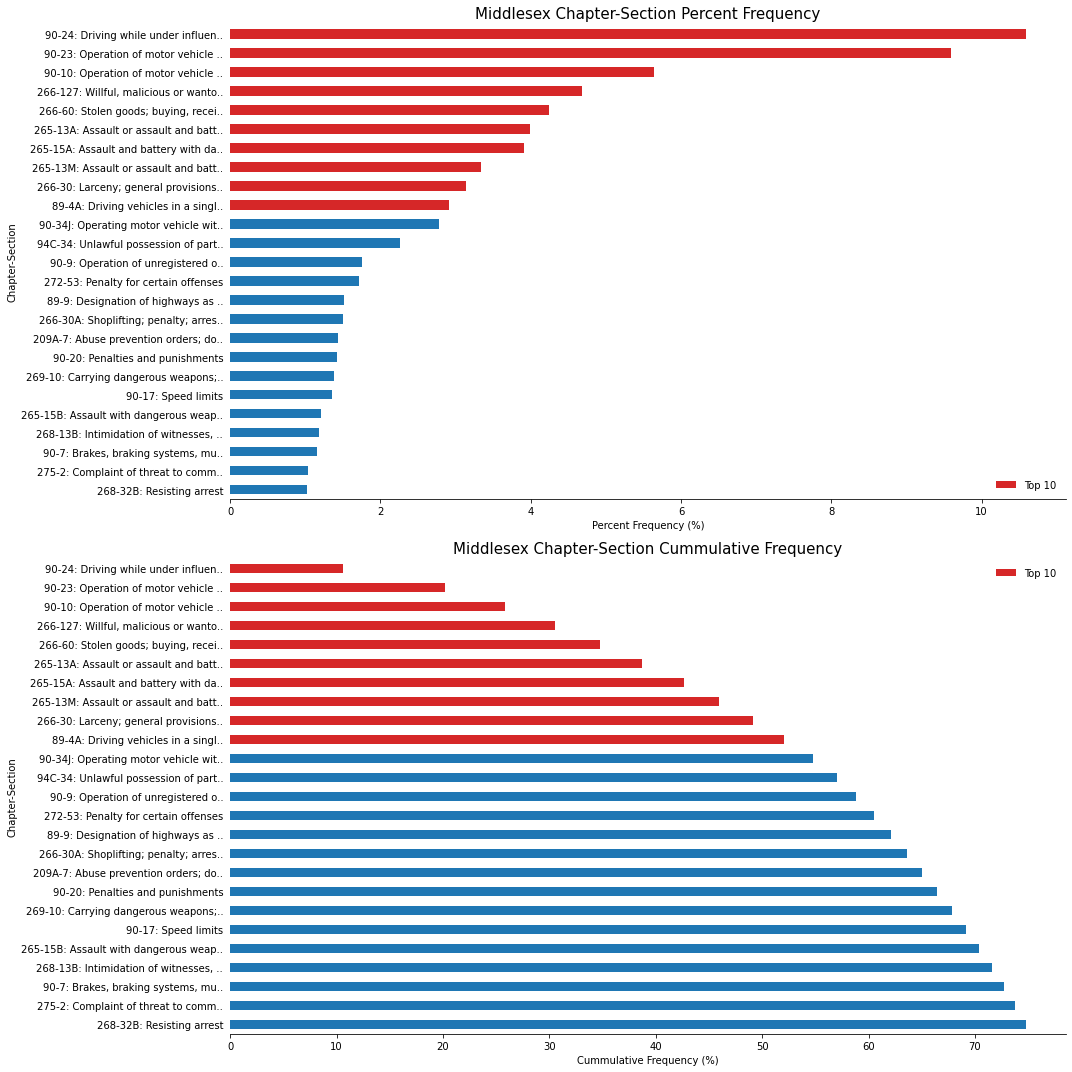

In [5]:
middlesex_cleaned_df = clean_data(middlesex_df)

middlesex_freq_df = plot_frequency(middlesex_cleaned_df, DA_name='Middlesex', num_bars=25)
display(middlesex_freq_df.iloc[:10])

# Northwestern

,Chapter-Section,Absolute # of Cases,Percent Frequency (%),Cumulative Frequency (%),Chapter,Section,Section_Heading
0,90-23,8095,10.914999,10.914999,90,23,Operation of motor vehicle after suspension or...
1,90-24,7169,9.666415,20.581414,90,24,Driving while under influence of intoxicating ...
2,90-10,3221,4.343078,24.924492,90,10,Operation of motor vehicle without license; me...
3,94C-34,3169,4.272963,29.197454,94C,34,Unlawful possession of particular controlled s...
4,NaN-NaN,3089,4.165094,33.362548,NaN,NaN,
5,266-30,2972,4.007335,37.369883,266,30,Larceny; general provisions and penalties
6,265-13A,2910,3.923737,41.293620,265,13A,Assault or assault and battery; punishment
7,90-34J,2481,3.345289,44.638908,90,34J,Operating motor vehicle without liability poli...
8,265-13M,2275,3.067526,47.706434,265,13M,Assault or assault and battery on a family or ...
9,89-4A,2175,2.932690,50.639124,89,4A,Driving vehicles in a single lane; motorcycles...


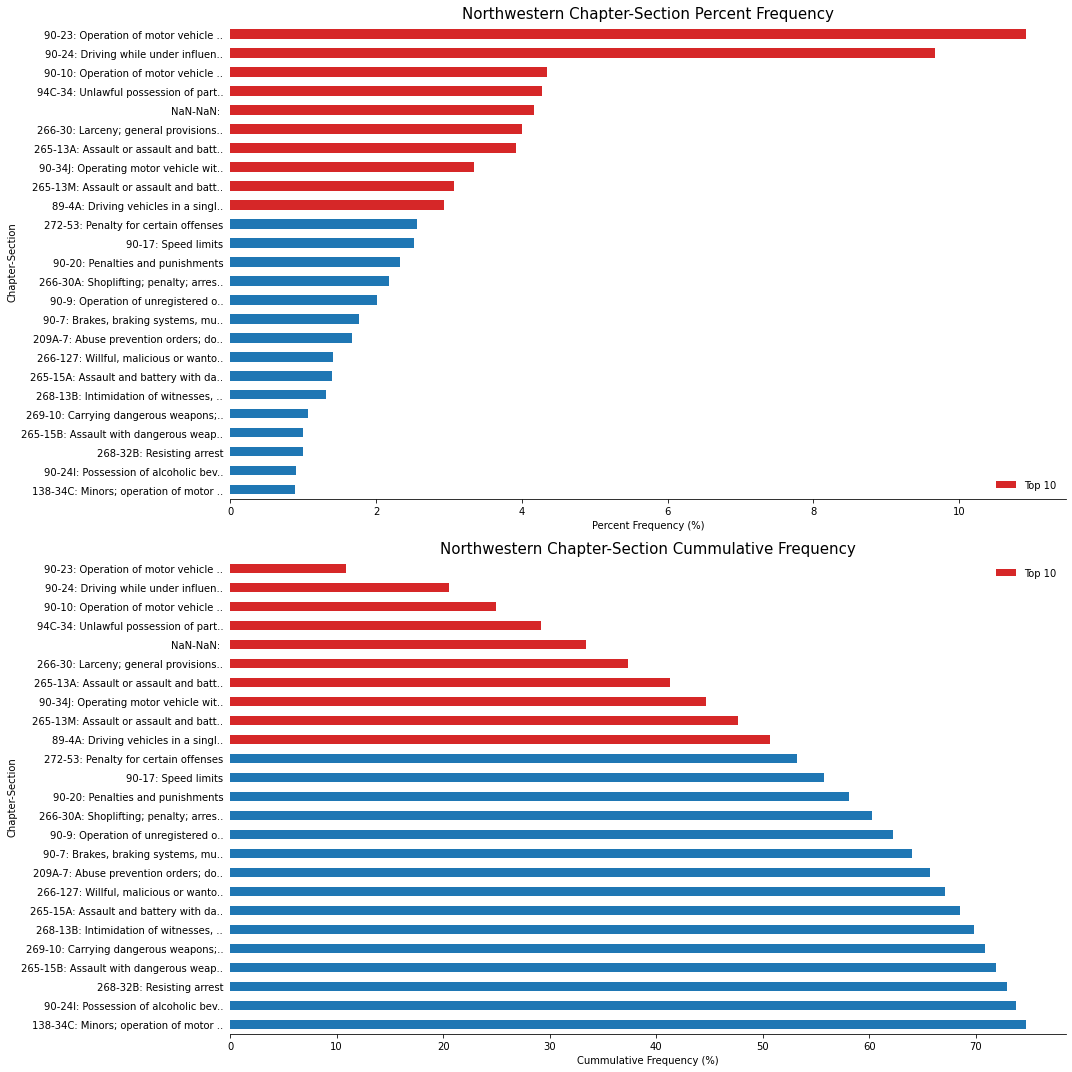

In [6]:
northwestern_cleaned_df = clean_data(northwestern_df)

northwestern_freq_df = plot_frequency(northwestern_cleaned_df, DA_name='Northwestern', num_bars=25)
display(northwestern_freq_df.iloc[:10])

# Suffolk

,Chapter-Section,Absolute # of Cases,Percent Frequency (%),Cumulative Frequency (%),Chapter,Section,Section_Heading
0,90-23,25042,8.391023,8.391023,90,23,Operation of motor vehicle after suspension or...
1,265-13A,16514,5.533478,13.924500,265,13A,Assault or assault and battery; punishment
2,94C-34,13360,4.476642,18.401142,94C,34,Unlawful possession of particular controlled s...
3,90-24,13228,4.432411,22.833553,90,24,Driving while under influence of intoxicating ...
4,90-10,12423,4.162674,26.996227,90,10,Operation of motor vehicle without license; me...
5,265-15A,9940,3.330675,30.326902,265,15A,Assault and battery with dangerous weapon; vic...
6,269-10,9216,3.088079,33.414981,269,10,Carrying dangerous weapons; possession of mach...
7,266-120,8941,2.995932,36.410913,266,120,Entry upon private property after being forbid...
8,272-53,8843,2.963095,39.374007,272,53,Penalty for certain offenses
9,266-30,8811,2.952372,42.326379,266,30,Larceny; general provisions and penalties


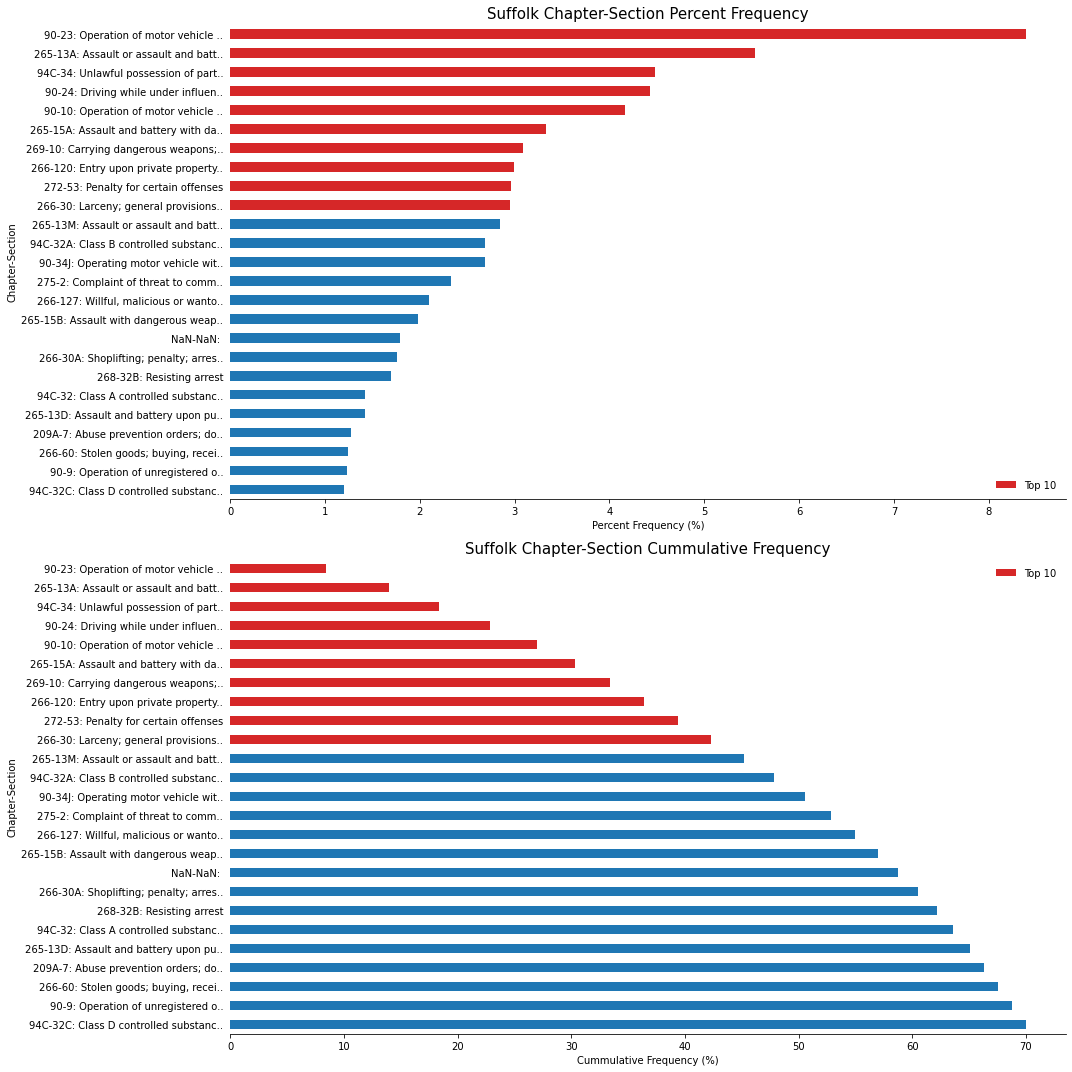

In [7]:
suffolk_cleaned_df = clean_data(suffolk_df)

suffolk_freq_df = plot_frequency(suffolk_cleaned_df, DA_name='Suffolk', num_bars=25)
display(suffolk_freq_df.iloc[:10])